In [31]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import QuantileTransformer


In [33]:
# Defining the column names and dataset specifications
column_names = ['D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR', 'D_DESTYCOOR']

# Specifications: min and max for each column
min_values = [500, 500, 500, 500]  
max_values = [600500, 5131500, 600500, 5131500]  
n_rows = 12176 

# Generate uniform random data
raw_data = np.random.uniform(size=(n_rows, len(column_names)))

# Apply a quantile transformation to match frequency distribution
quantile_transformer = QuantileTransformer(output_distribution='uniform', random_state=42)
transformed_data = quantile_transformer.fit_transform(raw_data)

# Scale the transformed data 
scaled_data = transformed_data * (np.array(max_values) - np.array(min_values)) + np.array(min_values)
scaled_data = np.clip(scaled_data, np.array(min_values), np.array(max_values))  # Ensure bounds


# Create a DataFrame with simulated data
df_data = pd.DataFrame(scaled_data, columns=column_names)


In [93]:
def create_model(input_dim):
    model = Sequential([
        Dense(350, activation='relu', input_dim=input_dim),
        Dropout(0.6),
        Dense(350, activation='relu'),
        Dropout(0.6),
        Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model


In [99]:
# Define input and output for training
X = df_data.values
y = df_data.values  # Self-reconstruction task

# Initialize and train the model
model = create_model(input_dim=X.shape[1])
model.fit(X, y, epochs=150, batch_size=32) 


Epoch 1/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 644470407168.0000 - mse: 644470407168.0000
Epoch 2/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 164719362048.0000 - mse: 164719362048.0000
Epoch 3/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 140823281664.0000 - mse: 140823281664.0000
Epoch 4/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 130863202304.0000 - mse: 130863202304.0000
Epoch 5/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 129620033536.0000 - mse: 129620033536.0000
Epoch 6/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126208458752.0000 - mse: 126208458752.0000
Epoch 7/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120679120896.0000 - mse: 120679120896.0000
Epoch 8/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 118063431680.0000 - mse: 118063431680.0000
Epoch 9/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 115486310400.0000 - mse: 115486310400.0000
Epoch 10/150
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11

In [100]:
# Predict and save results
predictions = model.predict(X)

# Save original data and predictions to CSV files
df_predictions = pd.DataFrame(predictions, columns=column_names)
df_predictions.to_csv("predictions_12176.csv", index=False)

print("Predictions saved to 'predictions_12176.csv'")


381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions saved to 'predictions_12176.csv'


In [101]:
print("Min and Max of Synthetic Data:")
print(df_data.min())
print(df_data.max())


Min and Max of Synthetic Data:
D_ORIXCOOR     500.0
D_ORIYCOOR     500.0
D_DESTXCOOR    500.0
D_DESTYCOOR    500.0
dtype: float64
D_ORIXCOOR      600500.0
D_ORIYCOOR     5131500.0
D_DESTXCOOR     600500.0
D_DESTYCOOR    5131500.0
dtype: float64


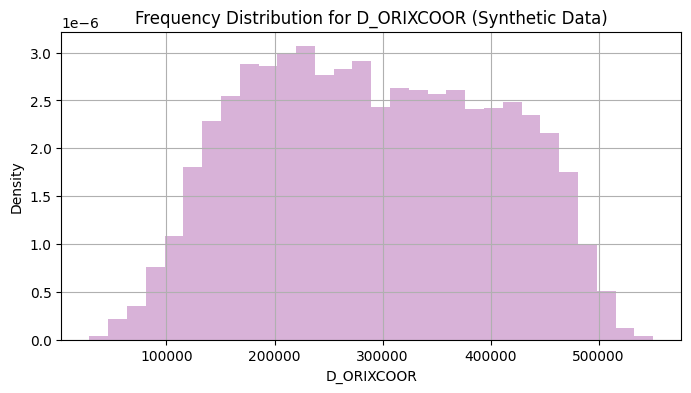

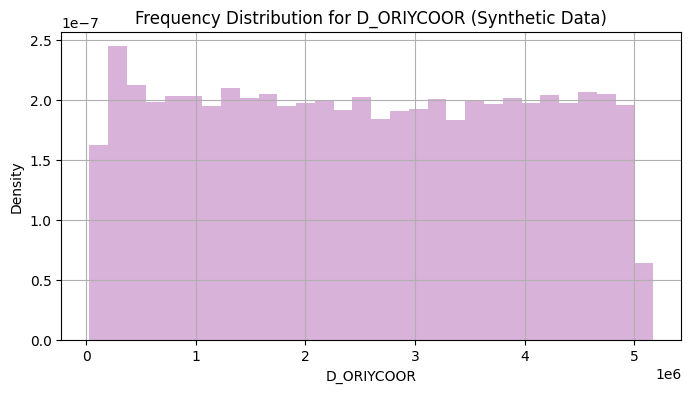

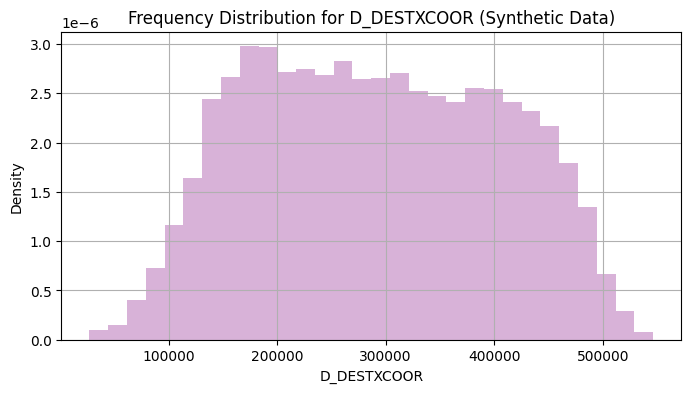

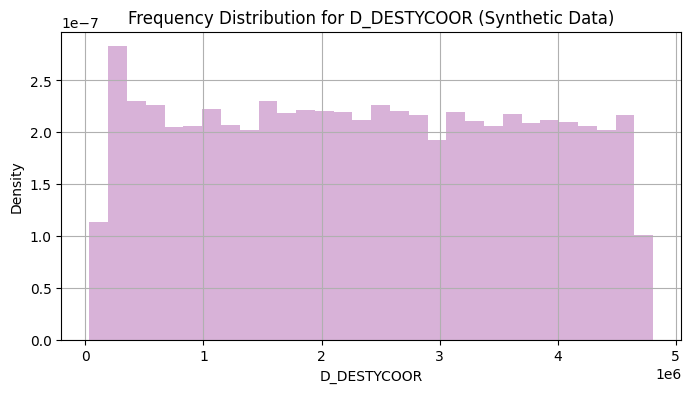

In [108]:
import matplotlib.pyplot as plt

# Frequency distribution for each column in synthetic data
for column in column_names:
    plt.figure(figsize=(8, 4))
    plt.hist(df_predictions[column], bins=30, alpha=0.3, color='purple', density=True)
    plt.title(f'Frequency Distribution for {column} (Synthetic Data)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


In [110]:
import matplotlib.pyplot as plt
import os

# Create a directory to store the plots
os.makedirs("plot 2", exist_ok=True)

# Save frequency distribution plots for each column in synthetic data
for column in column_names:
    plt.figure(figsize=(8, 6))
    plt.hist(df_predictions[column], bins=30, alpha=0.3, color='purple', density=True)
    plt.title(f'Frequency Distribution for {column} (Synthetic Data)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    
    # Save the plot as a PNG file in the "plot 2" directory
    plot_filename = f"plot 2/{column}_distribution.png"
    plt.savefig(plot_filename)
    plt.close()  # Close the figure after saving to avoid displaying it
